In [1]:
import os
import matplotlib.pyplot as plt
from skimage import io
import trackpy as tp
from image_helper import crop_image, check_polar
from particle_helper import create_particle, crop_particle
from optimizer import optimize_rotation_angle

import json
with open('particle_configurations.json') as f:
    configurations = json.load(f)

In [2]:
# Set the directory path
glacier_path = 'Z:\Mingxuan Liu'

# The folder where the .tif image stack exists
folder_name = '1Steel&1Cu_CopperUp_27_6fps_in'

# The file needed to be read
file_name = folder_name + ' binary crop.tif'

# Join the directory path, folder name, and file name to locate .tif images
tif_path = os.path.join(glacier_path, folder_name, file_name)

# frames = io.imread(tif_path)
frames = io.imread('1Steel&1Cu_CopperUp_27_6fps_in binary crop.tif')

# tracking parameters
params = {
    'diameter': 19,
    'minmass': 3000,
    'invert': False,
    'separation': 9,
}

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [3]:
config_name = "dimer-st-cu"  # name of the configuration
theta = 40
p = create_particle(config_name)
p.rotate('ax2', theta)
shadow_arr = p.shadow('xz', 10)
cropped_particle = crop_particle(shadow_arr, 36, 36)

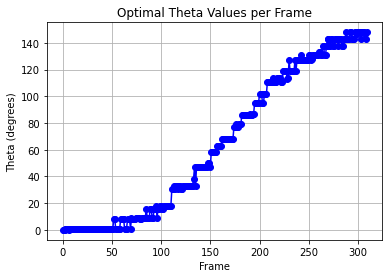

In [4]:
config_name = "dimer-st-cu"
p = create_particle(config_name)
# Initial guess for the rotation angle
initial_theta = 0
# List to store the optimal theta values
optimal_thetas = []
boundary = (36, 36)

# Loop through frames
for fr in range(len(frames)):
    # Get the experimental image
    cropped_image = crop_image(frames[fr], 36, 36, params)

    # Find the optimal rotation angle
    optimal_theta = optimize_rotation_angle(
        p, cropped_image, 10, boundary, initial_theta
    )

    # Use the found optimal rotation angle as the initial guess for the next frame
    initial_theta = optimal_theta
    # Append the optimal theta to the list
    optimal_thetas.append(optimal_theta)

# Plotting the optimal theta values
plt.plot(optimal_thetas, marker='o', linestyle='-', color='b')
plt.title('Optimal Theta Values per Frame')
plt.xlabel('Frame')
plt.ylabel('Theta (degrees)')
plt.grid(True)
plt.show()